# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combo_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combo_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [40]:
# Checking the number of mice.
mouse_count = len(combo_df["Mouse ID"].unique())
mouse_count

249

In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combo_df.loc[combo_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_df


array(['g989'], dtype=object)

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = combo_df.loc[combo_df["Mouse ID"] == "g989", :]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = combo_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
mouse_df = mouse_df[mouse_df["Mouse ID"] != "g989"]
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [22]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(mouse_df["Mouse ID"].unique())
clean_mice_count

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = mouse_df['Tumor Volume (mm3)'].groupby(mouse_df['Drug Regimen']).mean()
median = mouse_df['Tumor Volume (mm3)'].groupby(mouse_df['Drug Regimen']).median()
var = mouse_df['Tumor Volume (mm3)'].groupby(mouse_df['Drug Regimen']).var()
std = mouse_df['Tumor Volume (mm3)'].groupby(mouse_df['Drug Regimen']).std()
sem = mouse_df['Tumor Volume (mm3)'].groupby(mouse_df['Drug Regimen']).sem()




# Assemble the resulting series into a single summary DataFrame.
summary_stat_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                                "Median Tumor Volume":median, 
                                "Tumor Volume Variance":var, 
                                "Tumor Volume Std. Dev.":std, 
                                "Tumor Volume Std. Err.":sem})

summary_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
my_stat = ['mean', 'median', 'var', 'std', 'sem']
summary_agg_df =  mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(my_stat)
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

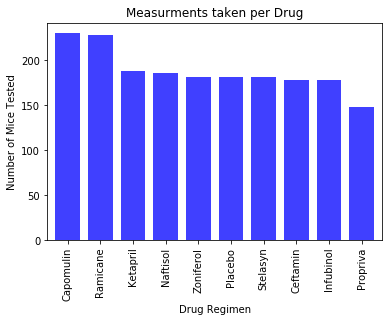

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = mouse_df["Drug Regimen"].value_counts()


plot_pandas = mice_count.plot(kind="bar",color='b', title="Measurments taken per Drug",
                              alpha=.75, width=.75, figsize=(6,4))

plot_pandas.set_xlabel("Drug Regimen")
plot_pandas.set_ylabel("Number of Mice Tested")  

plt.show()  

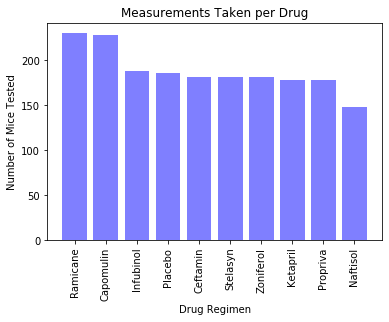

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

x_axis = np.arange(0, len(drug))
tick_locations = []
for x in x_axis:
  tick_locations.append(x)
  
plt.title("Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.bar(x_axis, mice_count, color="b", alpha=0.5, align="center")
plt.xticks(tick_locations, drug, rotation='vertical')
plt.show()

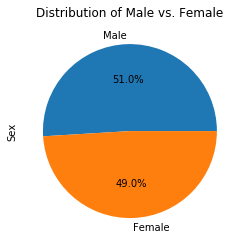

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = mouse_df[ "Sex"].value_counts()

gender_pie = gender_count.plot(kind="pie",title="Distribution of Male vs. Female", autopct="%1.1f%%")
gender_pie.set_ylabel("Sex")

plt.show()

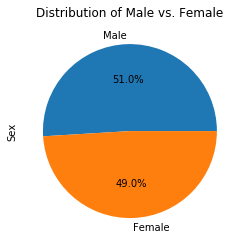

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
count = gender_count
plt.pie(count, labels=gender, autopct="%1.1f%%")
plt.title("Distribution of Male vs. Female")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor_df = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor_df = max_tumor_df.reset_index() 
# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [37]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_a = merged_tumor_df.loc[(merged_tumor_df["Drug Regimen"] == "Capomulin"), "Tumor Volume (mm3)"]
treatment_b = merged_tumor_df.loc[(merged_tumor_df["Drug Regimen"] == "Ramicane"), "Tumor Volume (mm3)"]
treatment_c = merged_tumor_df.loc[(merged_tumor_df["Drug Regimen"] == "Infubinol"), "Tumor Volume (mm3)"]
treatment_d = merged_tumor_df.loc[(merged_tumor_df["Drug Regimen"] == "Ceftamin"), "Tumor Volume (mm3)"]
treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

    


The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
The the median of Capomulin tumors is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
flierprops = dict(marker='o', markersize=8, markerfacecolor='r', markeredgecolor='k')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True,flierprops = flierprops)
plt.show()


## Line and Scatter Plots

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_filter = drug_capomulin.loc[drug_capomulin["Mouse ID"] == "l509"]
mouse_filter.head()

x_axis = mouse_filter["Timepoint"]
y_axis = mouse_filter["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis,y_axis, color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

NameError: name 'drug_capomulin' is not defined

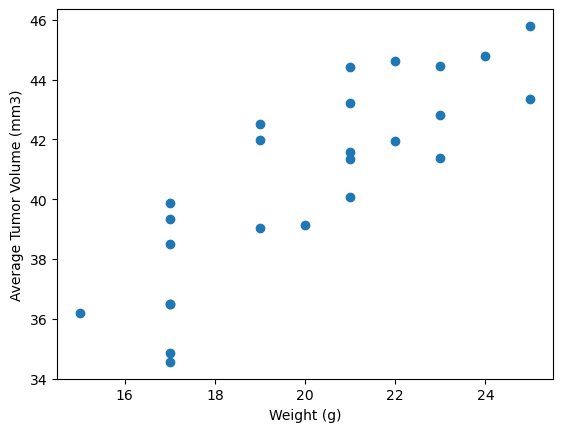

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol = drug_capomulin.groupby(["Mouse ID"]).mean()

plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"])
regress_values= avg_tumor_vol["Weight (g)"]* slope + intercept

plt.scatter(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_tumor_vol["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")

plt.show()

NameError: name 'avg_tumor_vol' is not defined